#### 생각나서 미리 적어두는 것....
이후 모델링할 때, 잠재변수를 세 개로 두고 하자.
이때 잠재변수는 LS(Life Satisfaction), PA(Positive Affection), NA(Negative Affection)으로 나눌 수 있다.

#### 설문지의 한계에 대해서도 말해볼까?
예를 들어, Q12에 대해서 긍정적으로 답변했다면, Q13에 대해서도 긍정적으로 답할 확률이 높다는 식으로?
(설문지법 자체의 한계에 대해서 언급하는 부분이니, 다른 팀과 차별점이 될 수도?)

### 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from collections import Counter 
from scipy.stats import chi2, chi2_contingency # chi-squared test with similar proportions
from scipy.stats import spearmanr
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#폰트 설정 #### 흐엉 왜 안 되는지 모르겠네
import matplotlib.font_manager as fm

path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] # 목록에서 처음 10 개만 보기

In [ ]:
font_list

### 데이터 가져오기

In [2]:
def data_load():
    data = pd.read_csv('data/Seoul_Happiness_2014_train.csv')

In [3]:
data = pd.read_csv('data/Seoul_Happiness_2014_train.csv')

In [4]:
#원본데이터 보존
raw_data = data.copy()

In [5]:
data.head()

,GU,FAM1,FAM2,HTYP,HLIV,INC,REL,JEN,MAR,RLI,...,DE3,DE4,DE5,DE6,DE7,DE8,DE9,wtb1,wtb2,X
0,680,2,2,2,1,5,1,1,1,6,...,2.0,3.0,1.0,680.0,5.0,2.0,3.0,256,1,1.0
1,680,2,2,2,1,5,2,2,1,6,...,2.0,3.0,1.0,680.0,5.0,4.0,4.0,196,1,1.0
2,680,5,5,2,1,11,3,2,2,6,...,3.0,6.0,2.0,680.0,5.0,3.0,2.0,220,1,1.0
3,680,5,5,2,1,11,3,2,2,6,...,3.0,6.0,2.0,680.0,5.0,3.0,4.0,185,1,1.0
4,680,5,5,2,1,11,3,1,2,6,...,1.0,6.0,2.0,680.0,5.0,3.0,4.0,270,2,1.0


In [6]:
data.shape

(31848, 198)

In [7]:
data.describe()

,GU,FAM1,FAM2,HTYP,HLIV,INC,REL,JEN,MAR,RLI,...,DE2,DE3,DE4,DE5,DE6,DE7,DE8,DE9,wtb2,X
count,31848.000000,31848.000000,31848.000000,31848.000000,31848.000000,31848.000000,31848.00000,31848.000000,31848.000000,31848.000000,...,31848.000000,31848.000000,31848.000000,31848.000000,31848.000000,31848.000000,31848.000000,31848.000000,31848.000000,31848.0
mean,438.972777,3.146446,2.761398,1.865831,1.528542,9.038244,1.87544,1.523298,1.437359,4.003862,...,3.827776,2.425427,4.568482,1.437359,438.972777,3.193419,2.969825,3.010111,1.073600,1.0
std,181.113686,1.015300,0.962869,0.889818,0.701770,3.456195,1.07593,0.499465,0.767159,2.238170,...,1.500718,0.708779,1.314164,0.767159,181.113686,1.269611,0.782738,0.933913,0.909568,0.0
min,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,0.000000,1.0
25%,290.000000,2.000000,2.000000,1.000000,1.000000,7.000000,1.00000,1.000000,1.000000,1.000000,...,3.000000,2.000000,4.000000,1.000000,290.000000,2.000000,3.000000,2.000000,1.000000,1.0
50%,440.000000,3.000000,3.000000,2.000000,1.000000,9.000000,2.00000,2.000000,1.000000,6.000000,...,4.000000,3.000000,5.000000,1.000000,440.000000,3.000000,3.000000,3.000000,1.000000,1.0
75%,590.000000,4.000000,4.000000,2.000000,2.000000,11.000000,2.00000,2.000000,2.000000,6.000000,...,5.000000,3.000000,6.000000,2.000000,590.000000,4.000000,3.000000,4.000000,1.000000,1.0
max,740.000000,7.000000,7.000000,5.000000,9.000000,19.000000,9.00000,2.000000,4.000000,6.000000,...,6.000000,4.000000,6.000000,4.000000,740.000000,5.000000,5.000000,4.000000,16.000000,1.0


In [8]:
data.dtypes

GU        int64
FAM1      int64
FAM2      int64
HTYP      int64
HLIV      int64
         ...   
DE8     float64
DE9     float64
wtb1     object
wtb2      int64
X       float64
Length: 198, dtype: object

In [9]:
Counter(data.dtypes)

Counter({dtype('int64'): 118, dtype('O'): 10, dtype('float64'): 70})

### 전처리(가장 걱정!!!)

####  결측치 또는 기타(무응답) 답변 확인 / 제거

In [10]:
def check(variable):
    print('결측치는 %d개' %data[variable].isnull().sum()) #check whether it is 0 or not
    print(data[variable].value_counts()) #check if there is any 무응답 또는 기타
    #if data[variable].value_counts().sum() == 31848: #check whether it is 31848 or not
    #    print('이상 없습니다')
    #else:
    #    print('뭔가 이상합니다. 다시 해보세요')

In [11]:
def rm_row(variable, idx):
    rm_index = data[data[variable]==idx].index
    data.drop(rm_index, inplace=True)

#### 1) FAM1~FAM2

(data['FAM1']-data['FAM2']).value_counts()
#전체 구성원과 15세 이상 가구원 인원 차이는 대부분 1명 내외 차이다.
data['FAM1'].value_counts()
#7인 가구 이상은 31848 가구 중 22가구 밖에 안 되므로 적극적으로 고려하지 않는다.

In [12]:
#FAM2 변수 제거
data.drop('FAM2', axis=1, inplace=True)

#### 2) HTYP

In [13]:
check('HTYP')

결측치는 0개
1    12772
2    12705
3     4374
4     1866
5      131
Name: HTYP, dtype: int64


In [14]:
rm_row('HTYP', 5) #5(기타) 제거

In [15]:
data.HTYP.replace({3:2, 4:2}, inplace=True) #1 이외 2로 통합

#### 3) HLIV

In [16]:
check('HLIV')

결측치는 0개
1    17541
2    12319
3     1408
4      368
5       43
9       38
Name: HLIV, dtype: int64


In [17]:
rm_row('HLIV', 5) #5(무상 및 기타) 제거
rm_row('HLIV', 9) #9(무응답) 제거

In [18]:
data.HLIV.replace({3:2, 4:2}, inplace=True) #1 이외 2로 통합

#### 4) INC

<img src="img/inc.png" style="width: 500px">

#### INC 기준1. 기초생활수급자 소득기준 
위의 기초생활수급자 소득기준표로 미루어보아, 200만원을 1차 cutline으로 잡는다.
2019년 4분기 월평균 소득은 4,771,921원이므로, 500만원을 2차 cutline으로 잡는다.(출처: 국가통계포털)

#### INC 기준2.국민기초생활보장법 기준
총 가구 중 소득순으로 순위를 매긴 후 정확히 가운데를 차지한 가구의 소득을 말하며 이는 소득계층을 구분하는 기준이 됩니다. 즉 중위소득의 50% 미만은 빈곤층이며 50~150%는 중산층, 150% 초과는 상류층으로 분류됩니다. 국가통계포털에 따르면, 2018년 중위소득은 220만원이며 매년 약 10만원 증가하는 것으로 보아 기준으로 100만원과 350만원을 각각 빈곤층와 상류층을 구분하는 척도로 활용하겠다.

##### 찝찝한 점: 빈곤층:중산층:상류층 비율이 2:5:3이어야 하는데...역시 설문조사란ㅠ

In [19]:
#INC 기준2.
INC_bins = [1, 2, 7, 19] # 구간을 설정한다. (0~25, ... , 75~100)
INC_bins_names = [1, 2, 3] # 구간별 이름 1: 빈곤층, 2: 중산층, 3: 상류층
categories = pd.cut(data['INC'], INC_bins, labels=INC_bins_names)
data['INC'] = categories

In [20]:
data['INC'].value_counts()

3    20694
2    10276
1      508
Name: INC, dtype: int64

In [21]:
#REL
rm_row('REL', 9) #9(기타) 제거
data.REL.replace({2:1, 3:2, 4:2, 5:2, 6:2, 7:2, 8:2, 9:2}, inplace=True) #1~2(가구자,배우자) vs. 그외

In [22]:
#RLI
rm_row('RLI', 5) #5(기타) 제거

In [23]:
#FC
data.drop('FC', axis=1, inplace=True)

#### 8) BIR

어떻게 할까나

In [24]:
#Q2B: 0(없다)로 넣는다.
data['Q2B'].fillna(0)

0        0.0
1        4.0
2        3.0
3        3.0
4        3.0
        ... 
31843    4.0
31844    0.0
31845    0.0
31846    0.0
31847    0.0
Name: Q2B, Length: 31597, dtype: float64

In [25]:
#Q3
#for idx in np.arange(0,len(data)+1):
#    data[idx, 'Q3'] = 11-data.loc[idx,'Q3A1':'Q3A11'].isnull().sum() #11개 중 얼마나 참여했는지
#... 코딩 어떻게 해야 할까요

In [26]:
#Q5 
data = data.assign(Q5 = np.mean(data.loc[:,'Q5A1':'Q5A4'], axis=1)) # A1~A4 평균값으로 새로 Q5 만듦
#data.drop(['Q5A1','Q5A2','Q5A3','Q5A4'], axis=1, inplace=True) #기존 변수들 제거

In [27]:
#Q6
data = data.assign(Q6 = np.mean(data.loc[:,'Q6A1':'Q6A13'], axis=1)) # A1~A13평균값으로 새로 Q6 만듦

In [28]:
#Q7, Q8, Q9 그대로 놔두기

In [29]:
#Q10
data.drop(['Q10A1','Q10A2','Q10A3','Q10A4', 'Q10A5'], axis=1, inplace=True) #기존 변수들 제거

In [30]:
#Q11 그대로 두기

In [31]:
#Q12
#Q12*2는 비용인데 결측치 많음. 0으로 넣어준다.
data.Q12A2.fillna(0, inplace=True)
data.Q12B2.fillna(0, inplace=True)
data.Q12C2.fillna(0, inplace=True)
data.Q12D2.fillna(0, inplace=True)
data.Q12E2.fillna(0, inplace=True)
data.Q12F2.fillna(0, inplace=True)
data.Q12G2.fillna(0, inplace=True)
data.Q12H2.fillna(0, inplace=True)

In [32]:
#Q12_1: 연간 총 방문횟수
data = data.assign(Q12_1 = np.sum(data.loc[:,['Q12A1','Q12B1','Q12C1','Q12D1','Q12E1','Q12F1','Q12G1','Q12H1']], axis=1))

In [33]:
#Q12_2: 연간 총 비용
#data.Q12A2.fillna(0).astype(str).replace(",","").astype(int)
# Q12*2 에서 object 중 ','를 어떻게 없애고 float로 만드는지 잘 모르겠다....
#data = data.assign(Q12_2 = np.sum(data.loc[:,['Q12A2','Q12B2','Q12C2','Q12D2','Q12E2','Q12F2','Q12G2','Q12H2']], axis=1))

In [34]:
#Q12I 그냥 지워버릴까
data.drop('Q12I',axis=1,inplace=True)

In [35]:
#Q13 그대로 두기

In [37]:
#Q14
rm_row('Q14A1', 8) # 8(기타) 제거 ... 18개밖에
data.Q14A1.replace({2:1, 3:2, 4:2, 5:2, 6:2, 7:1}, inplace=True) #1,2,7(개인적) vs 3,4,5,6(외부적)
data.drop('Q14A2', axis=1, inplace=True) # Q14A2 제거 (결측치 600개 이상)

In [38]:
#Q15 그대로 두기

In [39]:
#Q16
data.Q16A.fillna(0, inplace=True) #안 가본 애들은 0으로 처리해주기

In [40]:
#Q17
data.drop('Q17A2', axis=1, inplace=True) #Q17A2 제거하기
data.drop('Q17A3', axis=1, inplace=True) #Q17A3 제거하기

rm_row('Q17A1', 11) #11(기타) 제거 ... 22개 밖에
data.Q17A1.replace({2:1, 4:1, 7:1, 10:1, 3:2, 5:2, 6:2, 8:2, 9:2}, inplace=True) #1,2,4,7,10(정적) vs. 3,5,6,8,9(동적)
#여러번 실행하지 않도록 주의하기(모든 게 1로 수렴하게 됨)

In [41]:
#Q18
data.Q18.replace({3:2, 4:2, 5:2, 6:2}, inplace=True) #1(개인) vs. 나머지(여럿이)

In [42]:
#Q19
data.drop('Q19A2', axis=1, inplace=True) #Q19A2 제거하기

rm_row('Q19A1', 11) #11(기타) 제거 ... 2개 밖에
data.Q19A1.replace({2:1, 4:1, 7:1, 10:1, 3:2, 5:2, 6:2, 8:2, 9:2}, inplace=True) #1,2,4,7,10(정적) vs. 3,5,6,8,9(동적)
#여러번 실행하지 않도록 주의하기(모든 게 1로 수렴하게 됨)

In [43]:
#Q20
data.drop('Q20A', axis=1, inplace=True) #Q20A 제거하기 ... 결측치 9120개
data.drop(['Q20B1','Q20B2','Q20B3','Q20B4','Q20B5'], axis=1, inplace=True) #결측치 너무 많다.

### 분할표 만들어보기

In [44]:
#Contingency Table 만들기 함수
def make_contingency_table(X, Y):
    tab = pd.crosstab(data[X], data[Y], margins = False)
    return tab

In [45]:
#Contingency Table: JEN & MAR
make_contingency_table('JEN','MAR')

MAR,1,2,3,4
JEN,,,,
1,10815,3551,285,303
2,10768,3896,600,1157


### 카이제곱검정

단순 명목형인 경우에는 카이제곱검정을 통해서 각 변수간의 독립성을 살펴보고, 순서형 자료인 경우에는 ordinal한 특성을 고려해줄 수 있는 LogLinear Model을 적용해볼 수 있도록 할 예정이다.
근데, 행복지수에 대해서 conditional independence를 보면 더 좋을 것 같은데, 그건 아직 어떻게 하는지 모르겠네요ㅠ

In [46]:
# 아래 출처를 참고하여, 카이제곱검정를 해주는 함수를 만들어보았다. 나중에 test data 오더라도 바로 활용할 수 있도록?
def chisq_test(contingency_table):
    table = contingency_table
    stat, p, dof, expected = chi2_contingency(table)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [47]:
#예시: 성별과 결혼 여부
chisq_test(make_contingency_table('JEN','MAR'))
###카이제곱검정 귀무가설 기각. 즉, 성별에 따른 결혼 여부에는 유의한 차이가 있다.

probability=0.950, critical=7.815, stat=560.368
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### 크래머 V 계수(Cramer's V)

$$ \phi_c = \sqrt\frac{\chi^2}{N(k-1)}$$

<img src="img/cramer_v.png" style="width: 500px">

In [48]:
#출처: https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0] #카이제곱 검정통계량
    n = confusion_matrix.sum().sum() #총 사례 수 (공식이랑 틀린 거 같아서 개인적으로 수정해봄...추후 재확인 필요)
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [49]:
#JEN~MAR으로 예시 하나 만들어봄
contab_JEN_MAR = pd.crosstab(data['JEN'],data['MAR'],margins=False) #contab: contingency table

cramers_stat(contab_JEN_MAR)
#성별과 결혼 여부는 거의 상관이 없다.

0.13364256935448507

In [50]:
cramers_stat(make_contingency_table('INC','MAR'))
#임금수준과 결혼 여부는 약한 연관성이 있다.

0.19380326623676353

### 분할표 만들면서 바로 크래머 계수 계산하기

In [51]:
def direct_cramer_v(X, Y):
    table = make_contingency_table(X, Y)
    return cramers_stat(table)

In [52]:
direct_cramer_v('Q7', 'Q8')
#10년 대비, 또는 10년 후 위험정도 변화에 대한 변수 연관성은 충분히 강한 것으로 나타났다.

0.44926132313380035

In [53]:
direct_cramer_v('INC', 'Q9')
#지난 2주간의 스트레스는 임금 수준과 상관 없다.

0.03991728511362696

In [54]:
direct_cramer_v('Q13', 'Q13A')
#거주지 주변의 전반적인 문화환경 만족도와 서울의 전반적인 문화환경 만족도는 아주 연관성이 높았다.

0.44563910672725565

In [55]:
direct_cramer_v('FAM1','FAM2')
#FAM1과 FAM2는 강한 연관성이 있다.
#전처리해서 FAM2가 이미 날라갔다면, 오류가 뜰 것이다.

KeyError: 'FAM2'

In [56]:
direct_cramer_v('INC','Q15')

0.09323929831284514

### 스피어만 상관계수

스피어만 상관 계수는 두 변수 의 순위 사이의 통계적 의존성을 측정하는 비모수적인 척도이다. 이는 두 변수의 관계가 단조 함수를 사용하여 얼마나 잘 설명될 수 있는지를 평가한다. 스피어만 상관 계수는 순위가 매겨진 변수 간의 피어슨 상관 계수 로 정의된다.
출처: https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%94%BC%EC%96%B4%EB%A7%8C_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98

In [57]:
coef, p = spearmanr(data['JEN'], data['MAR'])

In [58]:
print(coef)
print(p)

0.08954312337934832
7.192154726784615e-57


In [60]:
spearmanr(data.Q13, data.Q13A)[0]

0.5094046351007891

### 시각화

범주형 자료의 correlation은 어떻게 시각화 할 수 있는지 모르겠다. 일단 심심해서 아무거나 그려봄

아! 전처리하고나서, 일일이 계산해서 sns_heatmap Correlation plot 그려볼까 싶다?!

#출처: https://www.kaggle.com/phaethonprime/eda-and-logistic-regression
res = pd.crosstab(df.Party, df.Vote)
res = res.div(res.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(res, annot=True, ax=ax); ax.set_title("Voting Split by Party");

In [61]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

C:\Users\bunga\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


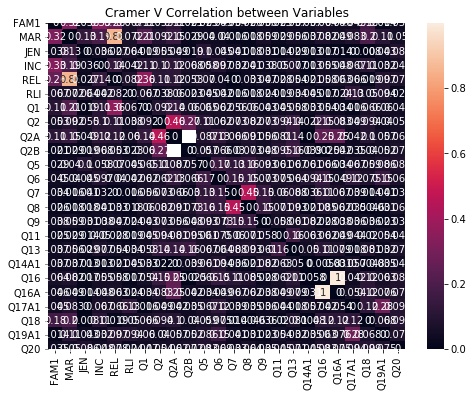

In [81]:
#전처리 완료한 것들만 넣어봄
cols = ["FAM1", "MAR", "JEN", "INC", 'REL', 'RLI','Q1','Q2','Q2A','Q2B','Q5','Q6','Q7','Q8','Q9','Q11','Q13','Q14A1','Q16','Q16A',
        'Q17A1','Q18','Q19A1','Q20']
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");
plt.show()

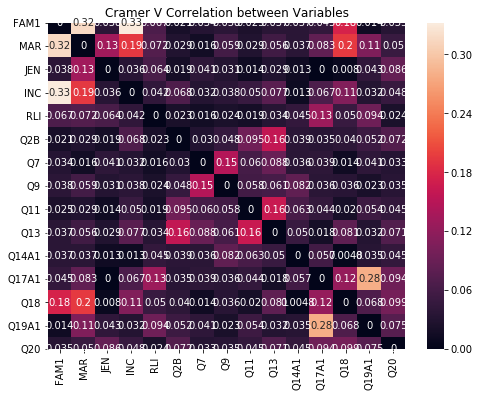

In [82]:
#궁금한 몇 개만 추려봄
cols = ["FAM1", "MAR", "JEN", "INC", 'RLI', 'Q2B', 'Q7', 'Q9', 'Q11','Q13', 'Q14A1', 'Q17A1','Q18','Q19A1','Q20']
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");
plt.show()

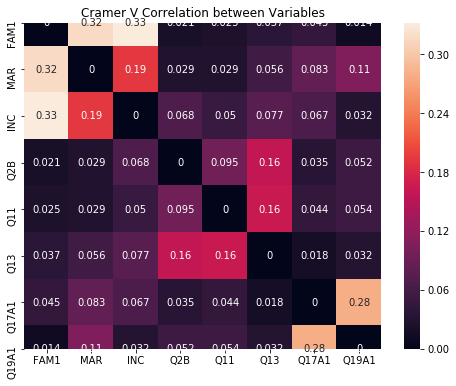

In [86]:
#마지막으로 몇 개만 추려봄
cols = ["FAM1", "MAR", "INC", 'Q2B', 'Q11','Q13', 'Q17A1','Q19A1']
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");
plt.show()

#### FAM1 - INC
#### FAM1 - MAR
#### MAR - INC
#### Q2B - Q13: 축제참여만족도 & 거주지주변 문화환경만족도
#### Q11 - Q13: 녹지 만족도 & 거주지주변 문화환경만족도
#### Q17A1 - Q19A1: 휴일여가활동 & 하고 싶은 여가활동

--------------------------

In [ ]:
plt.scatter(data['INC'], data['Q15'])
#어떻게 해석..?

In [ ]:
#이거는 그냥 구별 행복도 BOXPLOT
data.boxplot('Q4B','GU',rot = 30,figsize=(10,12))
plt.show()

In [ ]:
gu_count = data['GU'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gu_count.index, gu_count.values, alpha=0.9)
plt.title('구별 응답자 수')
plt.ylabel('응답자 수')
plt.xlabel('구')
plt.show()

-----------

### Reference

contingency & chisq 출처: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

--------------

### 습작

In [ ]:
#왜인지 모르겠지만 잘 안 됨
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))